In [1]:
# !pip3 install openpyxl

In [2]:
# !pip3 install patsy

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Heiti TC']
import seaborn as sns
import numpy as np
import pylab 
import scipy.stats as stats
from scipy.stats import shapiro,ttest_rel
from scipy.stats import pearsonr
from datetime import date

In [101]:
before = pd.read_excel("專業人員測驗題前測_202311060106_65483c0b70633.xlsx", sheet_name="前測", usecols=['編號:', 'Unnamed: 136', '1.1 出生年月：民國______年______月', '1.安寧緩和醫療條例是為了尊重末期病人的醫療意願及保障權益制定的法律。', '2.安寧緩和醫療指的是為了減輕或免除末期病人之生理、心理及靈性痛苦，所給予的緩解性、支持性的醫療照護，以增進生活品質。', '3.末期病人指罹患嚴重傷病，經醫師診斷認為無法治癒，且有醫學上之證據，近期內病程進行至死亡已無法避免者。', '1.2 性別：'])
before.rename(columns={'編號:': 'ID', 'Unnamed: 136': '前測', '1.1 出生年月：民國______年______月':'出生', '1.安寧緩和醫療條例是為了尊重末期病人的醫療意願及保障權益制定的法律。':'題目一', '2.安寧緩和醫療指的是為了減輕或免除末期病人之生理、心理及靈性痛苦，所給予的緩解性、支持性的醫療照護，以增進生活品質。':'題目二', '3.末期病人指罹患嚴重傷病，經醫師診斷認為無法治癒，且有醫學上之證據，近期內病程進行至死亡已無法避免者。':'題目三', '1.2 性別：':'性別'}, inplace=True)
before['出生'] = pd.to_datetime(before['出生'])
before['年齡'] = before['出生'].apply(lambda x:date.today().year - x.year)
before.drop_duplicates(inplace=True)
before = before.iloc[1: , :]
print(before)

     ID 題目一 題目二 題目三         出生   性別  前測   年齡
1    89   O   O   O 1985-04-19  0.女  48   38
2    90   O   O   O 1988-10-26  0.女  49   35
3    91   O   O   O 1951-09-02  0.女  50   72
4    92   O   O   O 1950-11-22  0.女  49   73
5    93   O   O   O 1842-10-19  1.男  49  181
..   ..  ..  ..  ..        ...  ...  ..  ...
101  84   O   O   O 1976-09-03  0.女  50   47
102  85   O   O   O 1954-07-14  1.男  50   69
103  86   O   O   O 1956-04-23  0.女  50   67
104  87   O   O   O 1950-05-13  1.男  50   73
105  88   O   O   O 1955-08-26  1.男  49   68

[105 rows x 8 columns]


In [102]:
import pandas as pd
    
after = pd.read_excel("專業人員測驗題前測_202311060106_65483c0b70633.xlsx", sheet_name="後測", usecols=['編號:', 'Unnamed: 64'])
after.rename(columns={'編號:': 'ID', 'Unnamed: 64': '後測'}, inplace=True)
print(after)

    ID  後測
0   89  50
1   90  50
2   91  50
3   92  50
4   93  49
..  ..  ..
94  88  50
95  25  49
96  28  50
97  26  50
98  29  50

[99 rows x 2 columns]


In [103]:
df = pd.merge(before, after, on='ID')
df

,ID,題目一,題目二,題目三,出生,性別,前測,年齡,後測
0,89,O,O,O,1985-04-19,0.女,48,38,50
1,90,O,O,O,1988-10-26,0.女,49,35,50
2,91,O,O,O,1951-09-02,0.女,50,72,50
3,92,O,O,O,1950-11-22,0.女,49,73,50
4,93,O,O,O,1842-10-19,1.男,49,181,49
...,...,...,...,...,...,...,...,...,...
94,84,O,O,O,1976-09-03,0.女,50,47,50
95,85,O,O,O,1954-07-14,1.男,50,69,50
96,86,O,O,O,1956-04-23,0.女,50,67,50
97,87,O,O,O,1950-05-13,1.男,50,73,50


In [106]:
len(df[df['性別']=='0.女'])/len(df)

0.7676767676767676

In [105]:
len(df[df['題目二']=='O'])/len(df)

1.0

In [59]:
len(df[df['題目三']=='O'])/len(df)

0.99

In [16]:
df.to_excel('專業人員.xlsx')

In [60]:
print(df['前測'].describe())
print('='*20)
print(df['後測'].describe())

count    100.000000
mean      49.100000
std        1.566699
min       43.000000
25%       49.000000
50%       50.000000
75%       50.000000
max       50.000000
Name: 前測, dtype: float64
count    100.000000
mean      49.640000
std        0.915854
min       45.000000
25%       50.000000
50%       50.000000
75%       50.000000
max       50.000000
Name: 後測, dtype: float64


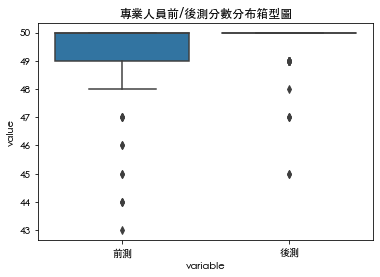

In [61]:
sns.boxplot(x="variable", y="value", data=pd.melt(df[['前測', '後測']]))
plt.title("專業人員前/後測分數分布箱型圖")
plt.show()

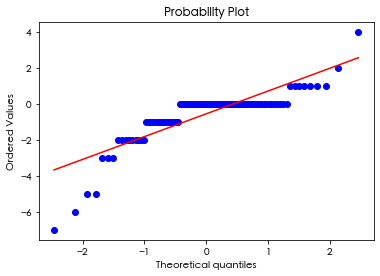

In [62]:
df['差值'] = df['前測'] - df['後測']
measurements = df['差值']
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [63]:
shapiro(df['差值'])

ShapiroResult(statistic=0.7401949167251587, pvalue=5.195609567576476e-12)

In [64]:
aa = np.mean(df['前測'])  
print('A方法均值:',aa)
bb = np.mean(df['後測'])  
print('B方法均值:',bb) 
junzhicha = aa - bb  
print('均值差:',junzhicha)

A方法均值: 49.1
B方法均值: 49.64
均值差: -0.5399999999999991


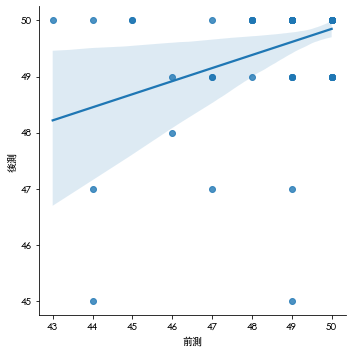

In [65]:
sns.lmplot(y='後測', x = '前測',data=df)
plt.show()

In [66]:
r = pearsonr(df['前測'], df['後測'])
print("pearson系数：",r[0])
print("P-Value：",r[1])

pearson系数： 0.39844614022097524
P-Value： 4.030395354930217e-05


In [67]:
from scipy.stats import wilcoxon

# 使用 Wilcoxon 符號秩測試 雙尾檢定
statistic, p_value = wilcoxon(df['前測'].tolist(),  df['後測'].tolist(), alternative='two-sided')

# 顯示結果
print("Wilcoxon statistic:", statistic)
print("P-value:", p_value)

# 判斷結果是否顯著
alpha = 0.05
if p_value < alpha:
    print("統計上顯著，可以拒絕虛無假設，表示前後測有差異。")
else:
    print("統計上不顯著，不能拒絕虛無假設，表示前後測無差異。")


Wilcoxon statistic: 155.0
P-value: 0.0001445856996807968
統計上顯著，可以拒絕虛無假設，表示前後測有差異。


In [68]:
print("後測正確填答率為： ", df['後測'].tolist().count(50)/len(df['後測'].tolist())*100, "%")

後測正確填答率為：  79.0 %


In [69]:
print(df['年齡'].max())
print(df['年齡'].min())

181
0


In [71]:
print(df['前測'].tolist())

[49, 49, 48, 49, 50, 49, 49, 45, 50, 50, 50, 50, 49, 49, 50, 50, 49, 50, 46, 49, 50, 45, 50, 50, 44, 49, 50, 50, 50, 50, 50, 47, 50, 50, 49, 50, 50, 50, 50, 44, 44, 50, 48, 46, 50, 50, 48, 49, 50, 50, 49, 50, 50, 49, 49, 50, 48, 49, 47, 47, 50, 50, 50, 50, 50, 49, 49, 48, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 43, 50, 50, 50, 50, 49, 50, 50, 50, 49, 48, 48, 50, 47, 50, 50, 50, 50, 50]


In [73]:
print(len(df['後測'].tolist()))

100


In [83]:
import statistics
statistics.mean(df[(df['年齡']>3)&(df['年齡']<100)]['年齡'].tolist())

46.41237113402062

In [107]:
max(df[(df['年齡']>3)&(df['年齡']<100)]['年齡'].tolist())

73

In [108]:
min(df[(df['年齡']>3)&(df['年齡']<100)]['年齡'].tolist())

21

In [84]:
print(df[(df['年齡']>3)&(df['年齡']<100)]['年齡'].tolist())

[70, 68, 38, 35, 72, 73, 40, 56, 60, 56, 60, 57, 36, 34, 66, 69, 44, 62, 47, 31, 56, 53, 63, 46, 48, 48, 21, 49, 50, 28, 57, 42, 27, 42, 25, 46, 53, 23, 24, 38, 46, 47, 44, 41, 35, 38, 40, 38, 66, 73, 59, 45, 44, 57, 67, 67, 48, 42, 47, 52, 40, 40, 47, 60, 51, 23, 41, 42, 31, 24, 22, 23, 62, 28, 21, 24, 47, 57, 41, 27, 27, 56, 46, 45, 64, 68, 34, 24, 30, 41, 71, 41, 39, 47, 69, 67, 73]


In [85]:
df[df['年齡']==73]

,ID,題目一,題目二,題目三,出生,前測,年齡,後測,差值
5,92,O,O,O,1950-11-22,49,73,50,-1
51,31,O,O,O,1950-12-02,50,73,50,0
99,87,O,O,O,1950-05-13,50,73,50,0
